In [2]:
import pandas as pd
import seaborn as sn
movies=pd.read_csv('tmdb-movies.csv')
movies=movies.dropna(how='all')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

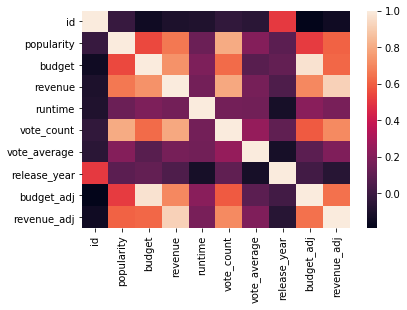

In [3]:
sn.heatmap(movies.corr())

In [3]:
movies.drop(['imdb_id','popularity','cast','homepage','director','tagline','keywords','overview','genres','production_companies','release_date','vote_count','vote_average','budget_adj','revenue_adj'],axis=1,inplace=True)
movies['profit']=movies.revenue-movies.budget
movies.head()

,id,budget,revenue,original_title,runtime,release_year,profit
0,135397,150000000,1513528810,Jurassic World,124,2015,1363528810
1,76341,150000000,378436354,Mad Max: Fury Road,120,2015,228436354
2,262500,110000000,295238201,Insurgent,119,2015,185238201
3,140607,200000000,2068178225,Star Wars: The Force Awakens,136,2015,1868178225
4,168259,190000000,1506249360,Furious 7,137,2015,1316249360


In [4]:
movies.drop_duplicates(inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              10865 non-null  int64 
 1   budget          10865 non-null  int64 
 2   revenue         10865 non-null  int64 
 3   original_title  10865 non-null  object
 4   runtime         10865 non-null  int64 
 5   release_year    10865 non-null  int64 
 6   profit          10865 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 679.1+ KB


# Problem Statement 1(Most profit during 2000-2005) 

In [35]:
movies1=movies[(movies.release_year<=2005)&(movies.release_year>=2000)].sort_values('profit',ascending=False)
indexNames1=movies1[movies1['profit'] == 0 ].index
movies1.drop(indexNames1 , inplace=True)
print("{} had the most profit during 2000-2005".format(movies1.iloc[0,3]))

The Lord of the Rings: The Return of the King had the most profit during 2000-2005


# Problem Statement 2(Movies with second lowest and second highest budget)

In [6]:
movies2=movies.sort_values('budget')
indexNames2=movies2[movies2['budget'] == 0 ].index
movies2.drop(indexNames2 , inplace=True)
print("{} with second lowest budget".format(movies2.iloc[1,3]))
print("{} with second highest budget".format(movies2.iloc[-2,3]))


Lost & Found with second lowest budget
Pirates of the Caribbean: On Stranger Tides with second highest budget


# Problem Statement 3(Movies with most and least earned revenue)


In [7]:
movies3=movies.sort_values('revenue')
indexNames3=movies3[movies3['revenue'] == 0 ].index
movies3.drop(indexNames3 , inplace=True)
print("{} with least earned revenue".format(movies3.iloc[0,3]))
print("{} with most earned revenue".format(movies3.iloc[-1,3]))


Mallrats with least earned revenue
Avatar with most earned revenue


# Problem Statement 4(Average runtime of movies in the year 2000)

In [37]:
movies4=movies[movies.release_year==2000]
indexNames4=movies4[movies4['runtime'] == 0 ].index
movies4.drop(indexNames4 , inplace=True)
print("Average runtime of movies in the year 2000 is {}".format(movies4.runtime.mean()))

Average runtime of movies in the year 2000 is 104.23893805309734
